# KNN Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("gene_expression.csv")

df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


### Exploratory Data Analysis.

<AxesSubplot: xlabel='Gene One', ylabel='Gene Two'>

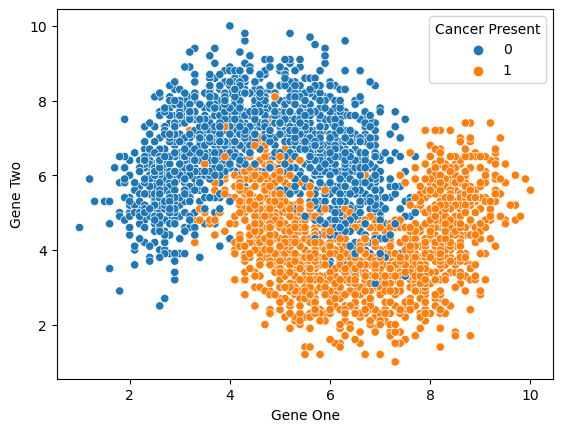

In [4]:
sns.scatterplot(x="Gene One",y="Gene Two",hue="Cancer Present",data=df)

### Split the Data

In [5]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

### Train | Test Splict

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Scaling Data (Mandatory Data)
- Scaling should be done after train test split, due to data lekage.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN

In [13]:
# Default Modelling. 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

#Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

#Evaluation

#1.train and test accuracy. 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

#2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model,X,y,cv=5)
scores.mean()

0.9433333333333334
0.9277777777777778


0.9266666666666667

### Hyperparameter Tuning for KNN Classifier

In [16]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,31)),"p":[1,2]}

cv_classifier = GridSearchCV(estimator, param_grid, cv=5, scoring = "accuracy")
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 22, 'p': 1}

## Rebuild the model with above K and P values. 

In [17]:
# Default Modelling. 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=22,p=1)
knn_model.fit(X_train,y_train)

#Prediction
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

#Evaluation

#1.train and test accuracy. 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

#2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model,X,y,cv=5)
scores.mean()

0.9323809523809524
0.9477777777777778


0.9343333333333333

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[450,  20],
       [ 27, 403]])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

